In [1]:
!pip install yfinance
!pip install bs4
!pip install matplotlib
!pip install nbformat

In [2]:
%matplotlib inline


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:

tesla_data = yf.download("TSLA", start="2020-01-01", end="2023-12-31")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price                       Date  Adj Close      Close       High        Low  \
Ticker                                 TSLA       TSLA       TSLA       TSLA   
0      2020-01-02 00:00:00+00:00  28.684000  28.684000  28.713333  28.114000   
1      2020-01-03 00:00:00+00:00  29.534000  29.534000  30.266666  29.128000   
2      2020-01-06 00:00:00+00:00  30.102667  30.102667  30.104000  29.333332   
3      2020-01-07 00:00:00+00:00  31.270666  31.270666  31.441999  30.224001   
4      2020-01-08 00:00:00+00:00  32.809334  32.809334  33.232666  31.215334   

Price        Open     Volume  
Ticker       TSLA       TSLA  
0       28.299999  142981500  
1       29.366667  266677500  
2       29.364668  151995000  
3       30.760000  268231500  
4       31.580000  467164500  


In [5]:
tesla = yf.Ticker("TSLA")

tesla_financials = tesla.financials.T 

tesla_revenue = tesla_financials[['Total Revenue']].reset_index()
tesla_revenue.rename(columns={'index': 'Date', 'Total Revenue': 'Revenue'}, inplace=True)

print(tesla_revenue.tail())

        Date        Revenue
0 2023-12-31  96773000000.0
1 2022-12-31  81462000000.0
2 2021-12-31  53823000000.0
3 2020-12-31  31536000000.0
4 2019-12-31            NaN


In [6]:
gme_data = yf.download("GME", start="2020-01-01", end="2023-12-31")

gme_data.reset_index(inplace=True)

gme_data_head = gme_data.head()
gme_data_head

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME,GME
0,2020-01-02 00:00:00+00:00,1.5775,1.5775,1.6175,1.5175,1.5350,17814400
1,2020-01-03 00:00:00+00:00,1.4700,1.4700,1.5625,1.4600,1.5525,14175600
2,2020-01-06 00:00:00+00:00,1.4625,1.4625,1.4775,1.4000,1.4500,13579200
3,2020-01-07 00:00:00+00:00,1.3800,1.3800,1.4575,1.3600,1.4425,20912000
4,2020-01-08 00:00:00+00:00,1.4300,1.4300,1.4625,1.3525,1.3725,22517600


In [7]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [8]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install requests pandas beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [19]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
try:
    response = requests.get(url)

    if response.status_code == 200:
        tables = pd.read_html(response.text)
        gme_revenue = tables[0]  
        gme_revenue.reset_index(drop=True, inplace=True)

        print(gme_revenue.tail())
    else:
        print(f"Error al acceder a la página. Código de estado: {response.status_code}")
except Exception as e:
    print(f"Ocurrió un error: {e}")


    Tesla Annual Revenue (Millions of US $)  \
8                                      2013   
9                                      2012   
10                                     2011   
11                                     2010   
12                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
8                                     $2,013  
9                                       $413  
10                                      $204  
11                                      $117  
12                                      $112  


/tmp/ipykernel_602/3583498717.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


[*********************100%***********************]  1 of 1 completed


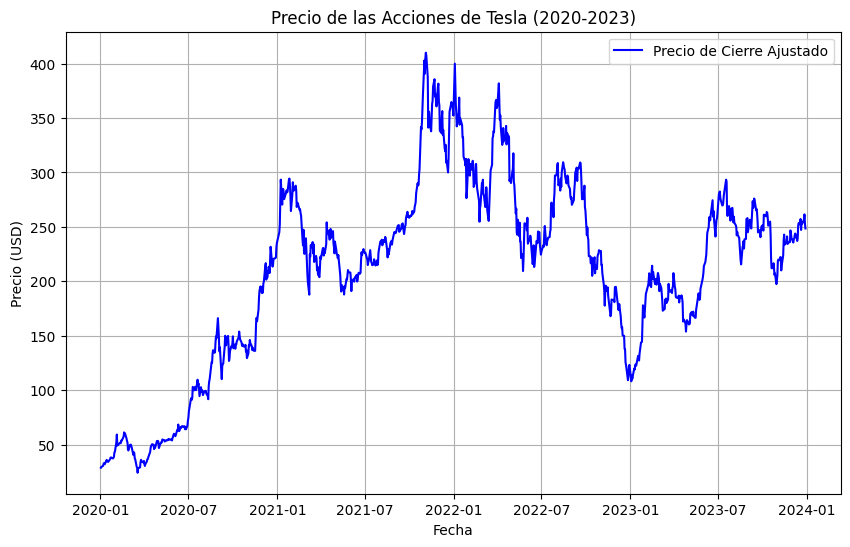

In [13]:

tesla_data = yf.download("TSLA", start="2020-01-01", end="2023-12-31")
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Adj Close'], label="Precio de Cierre Ajustado", color='blue')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Precio de las Acciones de Tesla (2020-2023)")

[*********************100%***********************]  1 of 1 completed


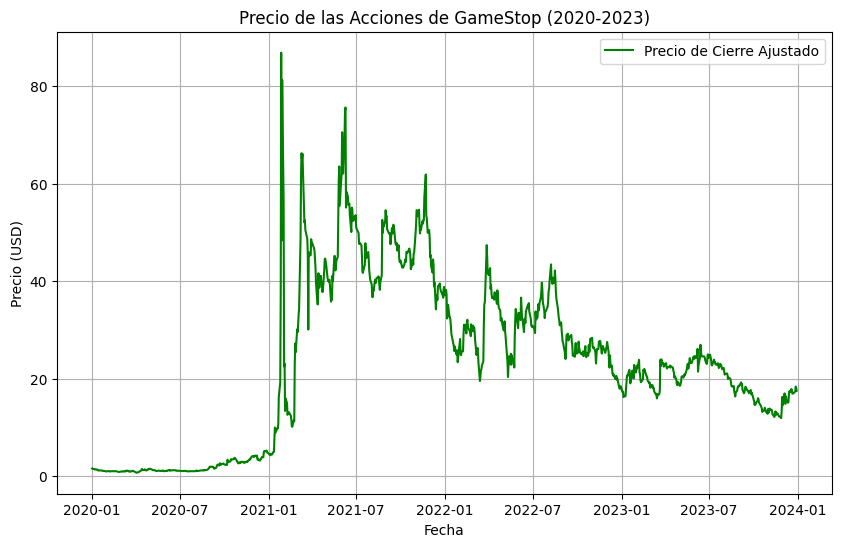

In [12]:
gme_data = yf.download("GME", start="2020-01-01", end="2023-12-31")

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Adj Close'], label="Precio de Cierre Ajustado", color='green')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(gme_data, "Precio de las Acciones de GameStop (2020-2023)")